In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [30]:
data = pd.read_csv("C:\\Users\\HP\\Desktop\\labs\\dmpa_project_final\\dmpa_2.csv")
data.head(5)

,Product_ID,Plant_Code,Ship_ahead_day_count,Ship_Late_Day_count,Destination_Port,Carrier,Unit_quantity,Weight
0,1700106,PLANT16,3,0,PORT09,V44_3,808,14.30
1,1700106,PLANT16,3,0,PORT09,V44_3,3188,87.94
2,1700106,PLANT16,3,0,PORT09,V44_3,2331,61.20
3,1700106,PLANT16,3,0,PORT09,V44_3,847,16.16
4,1700106,PLANT16,3,0,PORT09,V44_3,2163,52.34


In [31]:
features = ['Ship_ahead_day_count','Ship_Late_Day_count','Unit_quantity', 'Weight']
X = data[features]

In [32]:
# used for scaling the values it is used to standardize and normalize
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
# it is used to fit the values fit-mean and sd for x,transform-subtracts the mean and divide by sd

In [33]:
#n_neighbours-consider the nearest values for local density contamination is the proportion of data
lof = LocalOutlierFactor(n_neighbors=15, contamination=0.05)

#this fits the lof model to x_scaled predict method predicts the features with -1
y_pred = lof.fit_predict(X_scaled)

is_anomaly = y_pred == -1

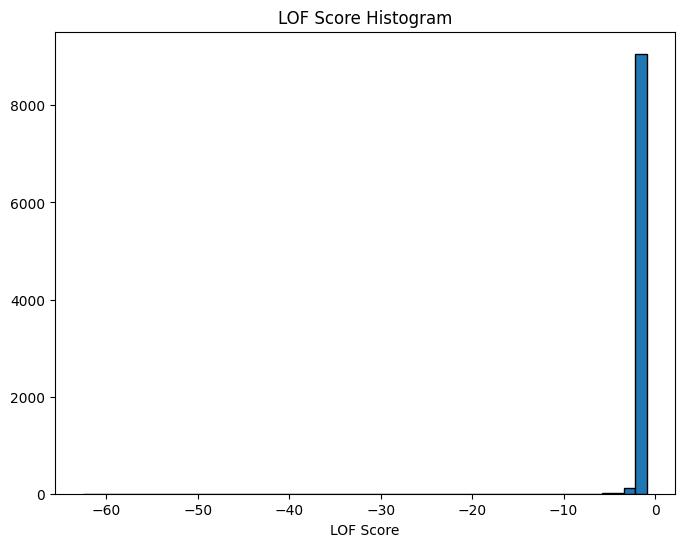

In [34]:
plt.figure(figsize=(8, 6))
plt.hist(lof.negative_outlier_factor_, bins=50, edgecolor='k')
plt.title("LOF Score Histogram")
plt.xlabel("LOF Score")
plt.show()


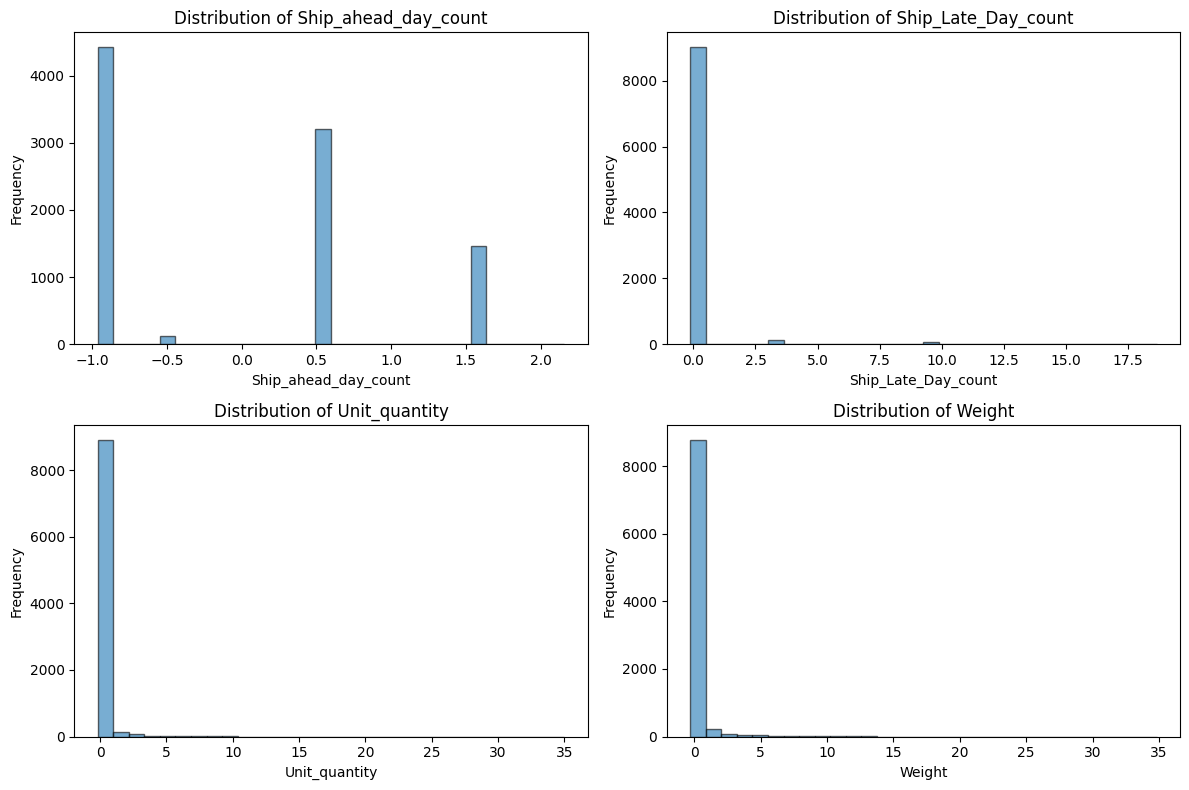

In [35]:
plt.figure(figsize=(12, 8))
for i in range(X_scaled.shape[1]):
    plt.subplot(2, 2, i + 1)
    plt.hist(X_scaled[:, i], bins=30, edgecolor='k', alpha=0.6)
    plt.title(f'Distribution of {features[i]}')
    plt.xlabel(features[i])
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


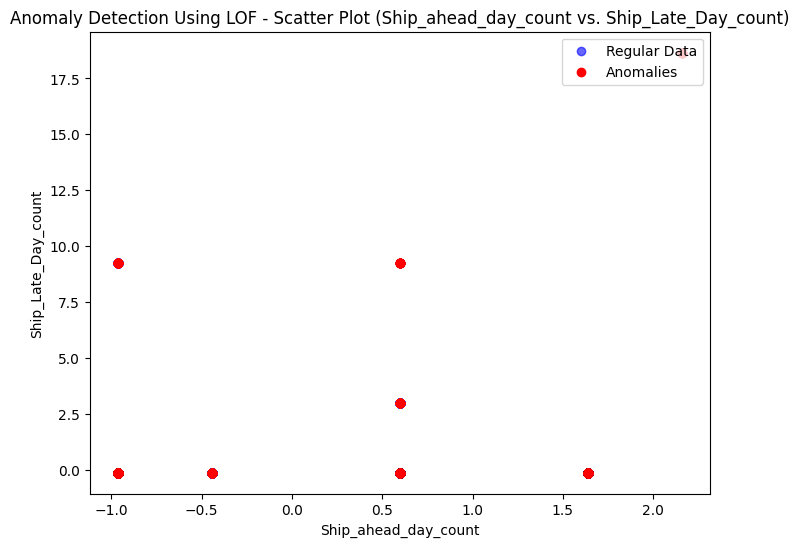

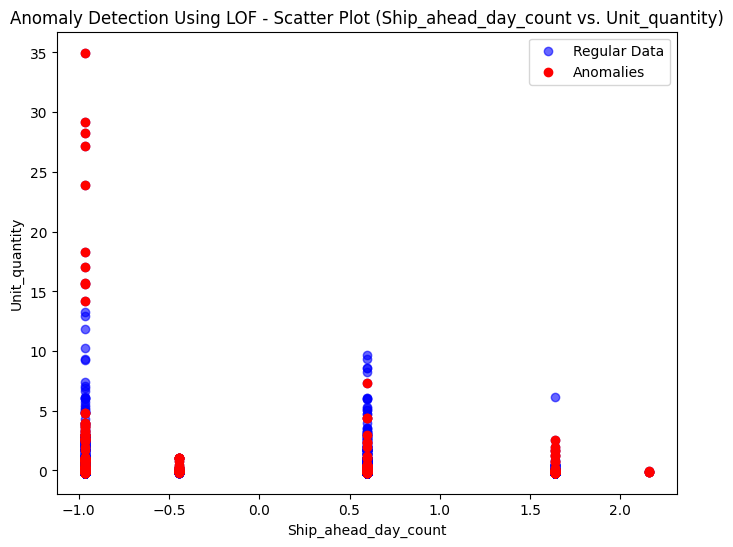

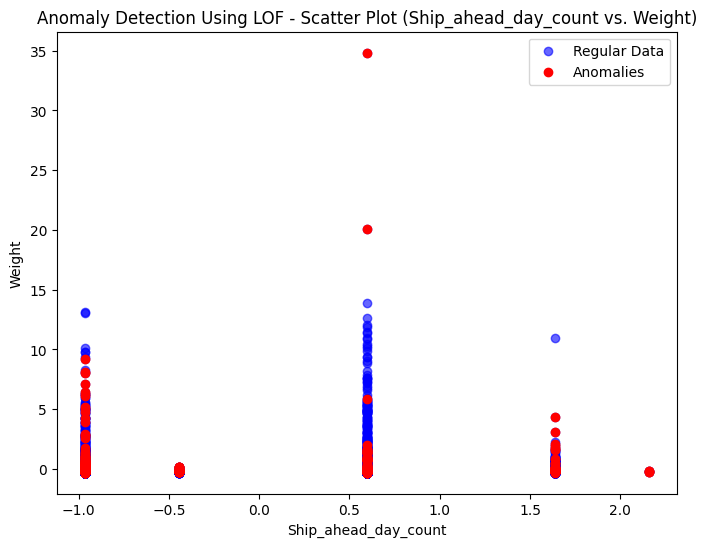

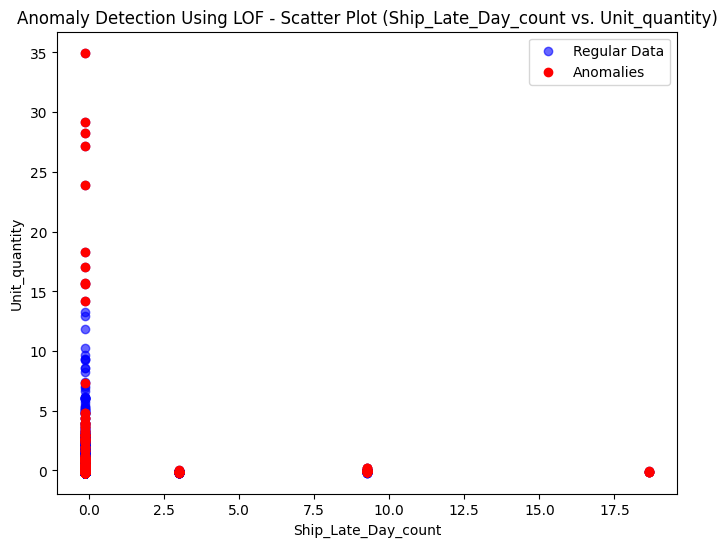

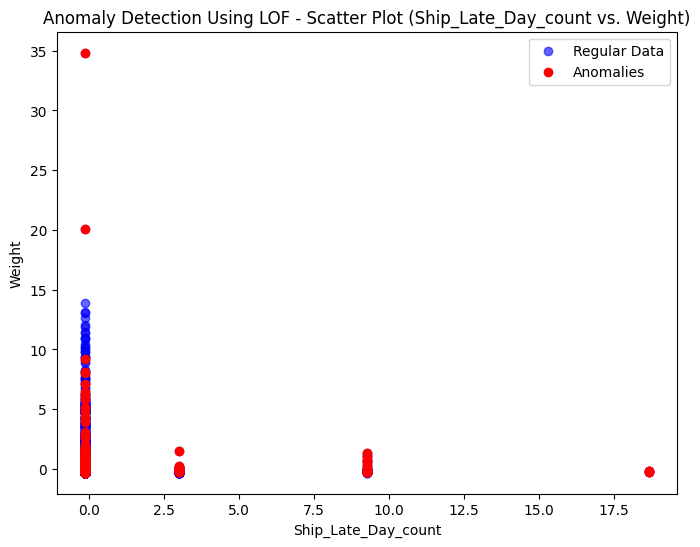

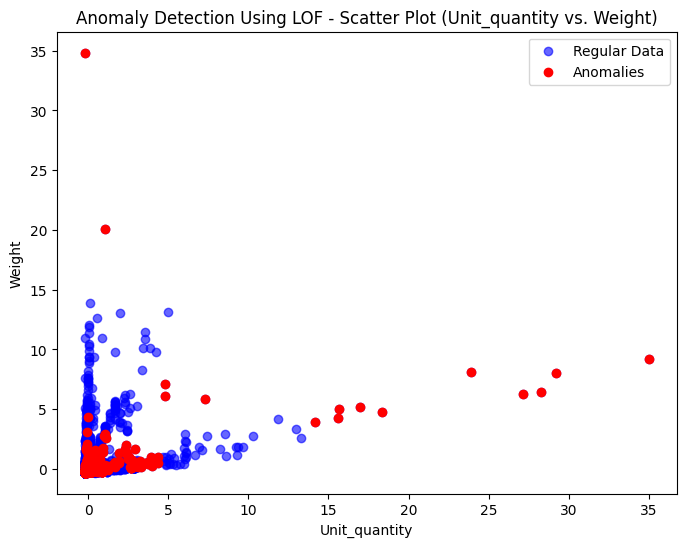

In [38]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='coolwarm', s=30)
# plt.title("Anomaly Detection - Scatter Plot")
# plt.xlabel("Ship ahead day count")
# plt.ylabel("Ship Late Day count")
# plt.show()
for i in range(len(features) - 1):
    for j in range(i + 1, len(features)):
        plt.figure(figsize=(8, 6))
        plt.scatter(X_scaled[:, i], X_scaled[:, j], c='blue', alpha=0.6, label='Regular Data')
        plt.scatter(X_scaled[is_anomaly, i], X_scaled[is_anomaly, j], c='red', label='Anomalies')
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.title(f'Anomaly Detection Using LOF - Scatter Plot ({features[i]} vs. {features[j]})')
        plt.legend(loc='upper right')
        plt.show()


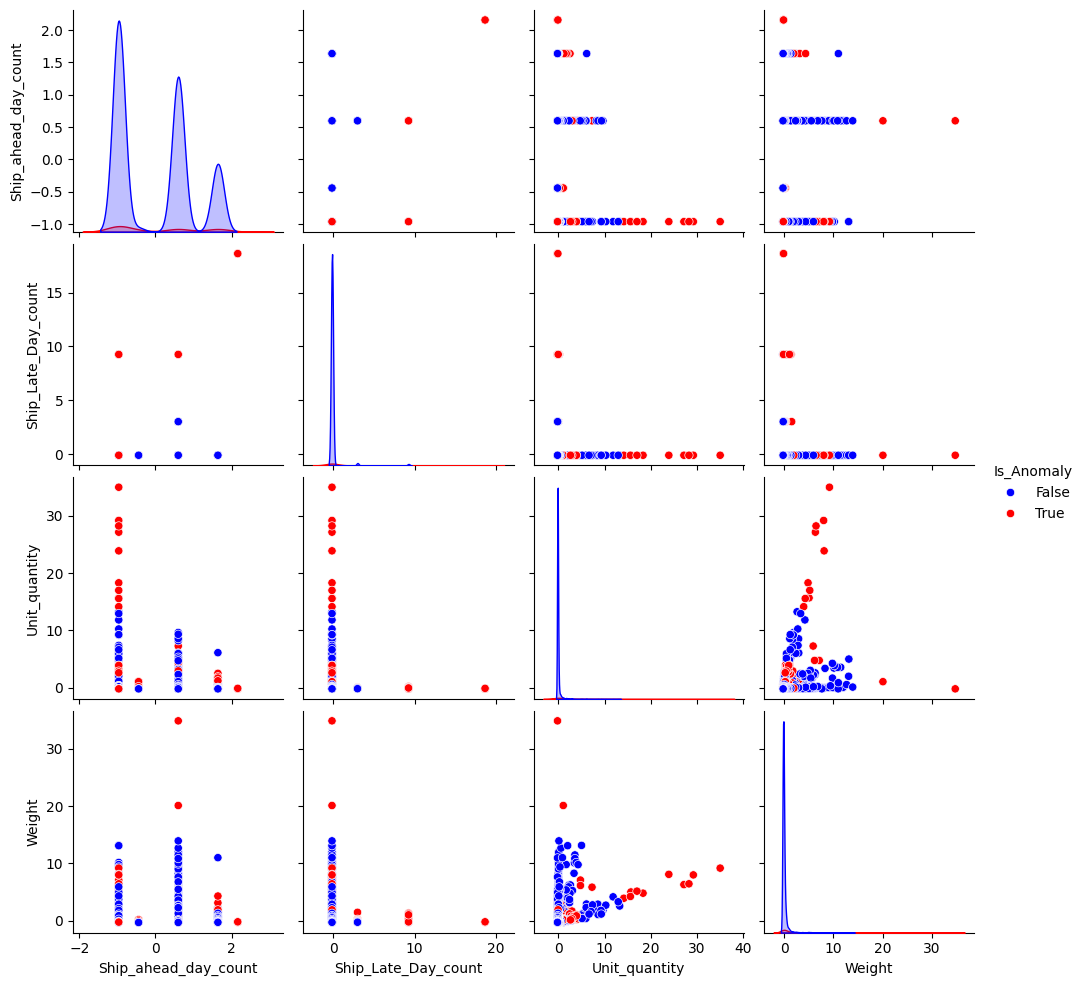

In [40]:
import seaborn as sns
data_with_anomalies = pd.concat([pd.DataFrame(X_scaled, columns=features), pd.DataFrame(is_anomaly, columns=["Is_Anomaly"])], axis=1)

# Create a pairplot with anomalies marked in red
sns.pairplot(data_with_anomalies, hue="Is_Anomaly", palette={0: 'blue', 1: 'red'})
plt.show()